# DSCI 100 Project Proposal

## Introduction

### Background

The goal of our project is to understand the difference between man made pollutants and compare and contrast it with sonar data that would be obtained from rocks. More specifically, we will look at the difference in sonar data from metallic cylinders alternatively known as mines. With accurate classification more can be known about the objects are within our oceans - simply by relying on sonar data. 

### Guiding Question

How can we classify an observation from sonar data to see whether it is a rock or a metal cylinder?

### Dataset

We will train the model using the Connectionist Bench (Sonar, Mines vs. Rocks) Data Set from the University of California Irvine. The data contains 111 patterns sonar information from mines and 97 patterns from rocks (with data points taken at different angles). This will allow us to write a classification algorithm differentiating between the two objects. 

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

## Preliminary exploratory data analysis 

### Loading libraries

To process the data, we will be using the `tidyverse`, `repr`, and `rvest` packages. 

In [26]:
library(tidyverse)
library(repr)
library(rvest)
library(cowplot

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”


### Reading the data

We will read the data directly from the UCI Machine Learning Repository (link https://archive.ics.uci.edu/ml/index.php). 

The last 10 rows will be outputted as a preview showing the current state of the data collected.

It is worthwhile to note that there are 60 columns, each denoting the energy within a frequency band over a period of time. And, each observation is a number between 0 and 1. 

We also preprocess the data to move the column that we are classifying by to the first column rather than the end to make it more clear which each observation represents, thus making it easier during the tidying stage.

In [4]:
data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE)

data1 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    select(-X61)

categories <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    pull(X61)

sonar_data <- tibble(categories, data1) %>%
    mutate(categories = as_factor(categories))

tail(sonar_data, 10) # only last 10 rows will be outputted as a preview

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.



categories,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,⋯,0.0186,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060
M,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,⋯,0.0202,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035
M,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,⋯,0.0137,0.0150,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085
M,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,⋯,0.0130,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031
M,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,⋯,0.0146,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103
M,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,⋯,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
M,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,⋯,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
M,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,⋯,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
M,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,⋯,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


### Tidying the data

In [5]:
data1 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    select(-X61)

categories <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    pull(X61)

sonar_data <- tibble(categories, data1) %>%
    mutate(categories = as_factor(categories))

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.



### Finding the mean
We plan to find the mean of each energy frequency as an indicator to classify by, and we will also do a second plot classifying by all the rows from X1:X60. 

In [15]:
average_data <- sonar_data %>%
    rowwise() %>%
    mutate(mean2 = mean(c_across(X31:X60)), `.after` = categories) %>%
    mutate(mean1 = mean(c_across(X1:X30)), `.after` = categories) %>%
    mutate(mean = mean(c_across(X1:X60)), `.after` = categories) 

tail(average_data, 5) # previewing the average plots

categories,mean,mean1,mean2,X1,X2,X3,X4,X5,X6,⋯,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.2519833,0.3813500,0.1226167,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,⋯,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
M,0.2529883,0.3767733,0.1292033,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,⋯,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
M,0.2416850,0.3553500,0.1280200,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,⋯,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
M,0.2397050,0.3697000,0.1097100,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,⋯,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048
M,0.2515450,0.3783767,0.1247133,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,⋯,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115


## Plot

We will compare and classify based on two plots, one plot being X1 and X2 and another plot being the mean frequency from the first 30 rows of the data and the mean frequency from the next 30 rows of data. Using the two plots, we will compare how accurate the knn model is with each to get a better idea whether to take the mean or to find sample frequencies. 

In [35]:
options(repr.plot.width = 10, repr.plot.height = 8)

average_plot <- ggplot(average_data, aes(x = mean1, y = mean2, , colour = categories)) +
    geom_point(alpha = 0.7) +
        labs(x = "Frequency from mean1",
             y = "Frequency from mean2",
            colour = "Category") +
        ggtitle("Frequency from mean 2 vs Frequency from mean 1") +
        theme(text = element_text(size = 20))

In [36]:
sonar_data_plot <- sonar_data %>%
    ggplot(aes(x = X1, 
               y = X2, 
               colour = categories)) +
        labs(x = "Frequency from X1",
             y = "Frequency from X2",
            colour = "Category") +
        geom_point(size = 2.5) +
        ggtitle("X2 Frequency vs X1 Frequency") +
        theme(text = element_text(size = 20))

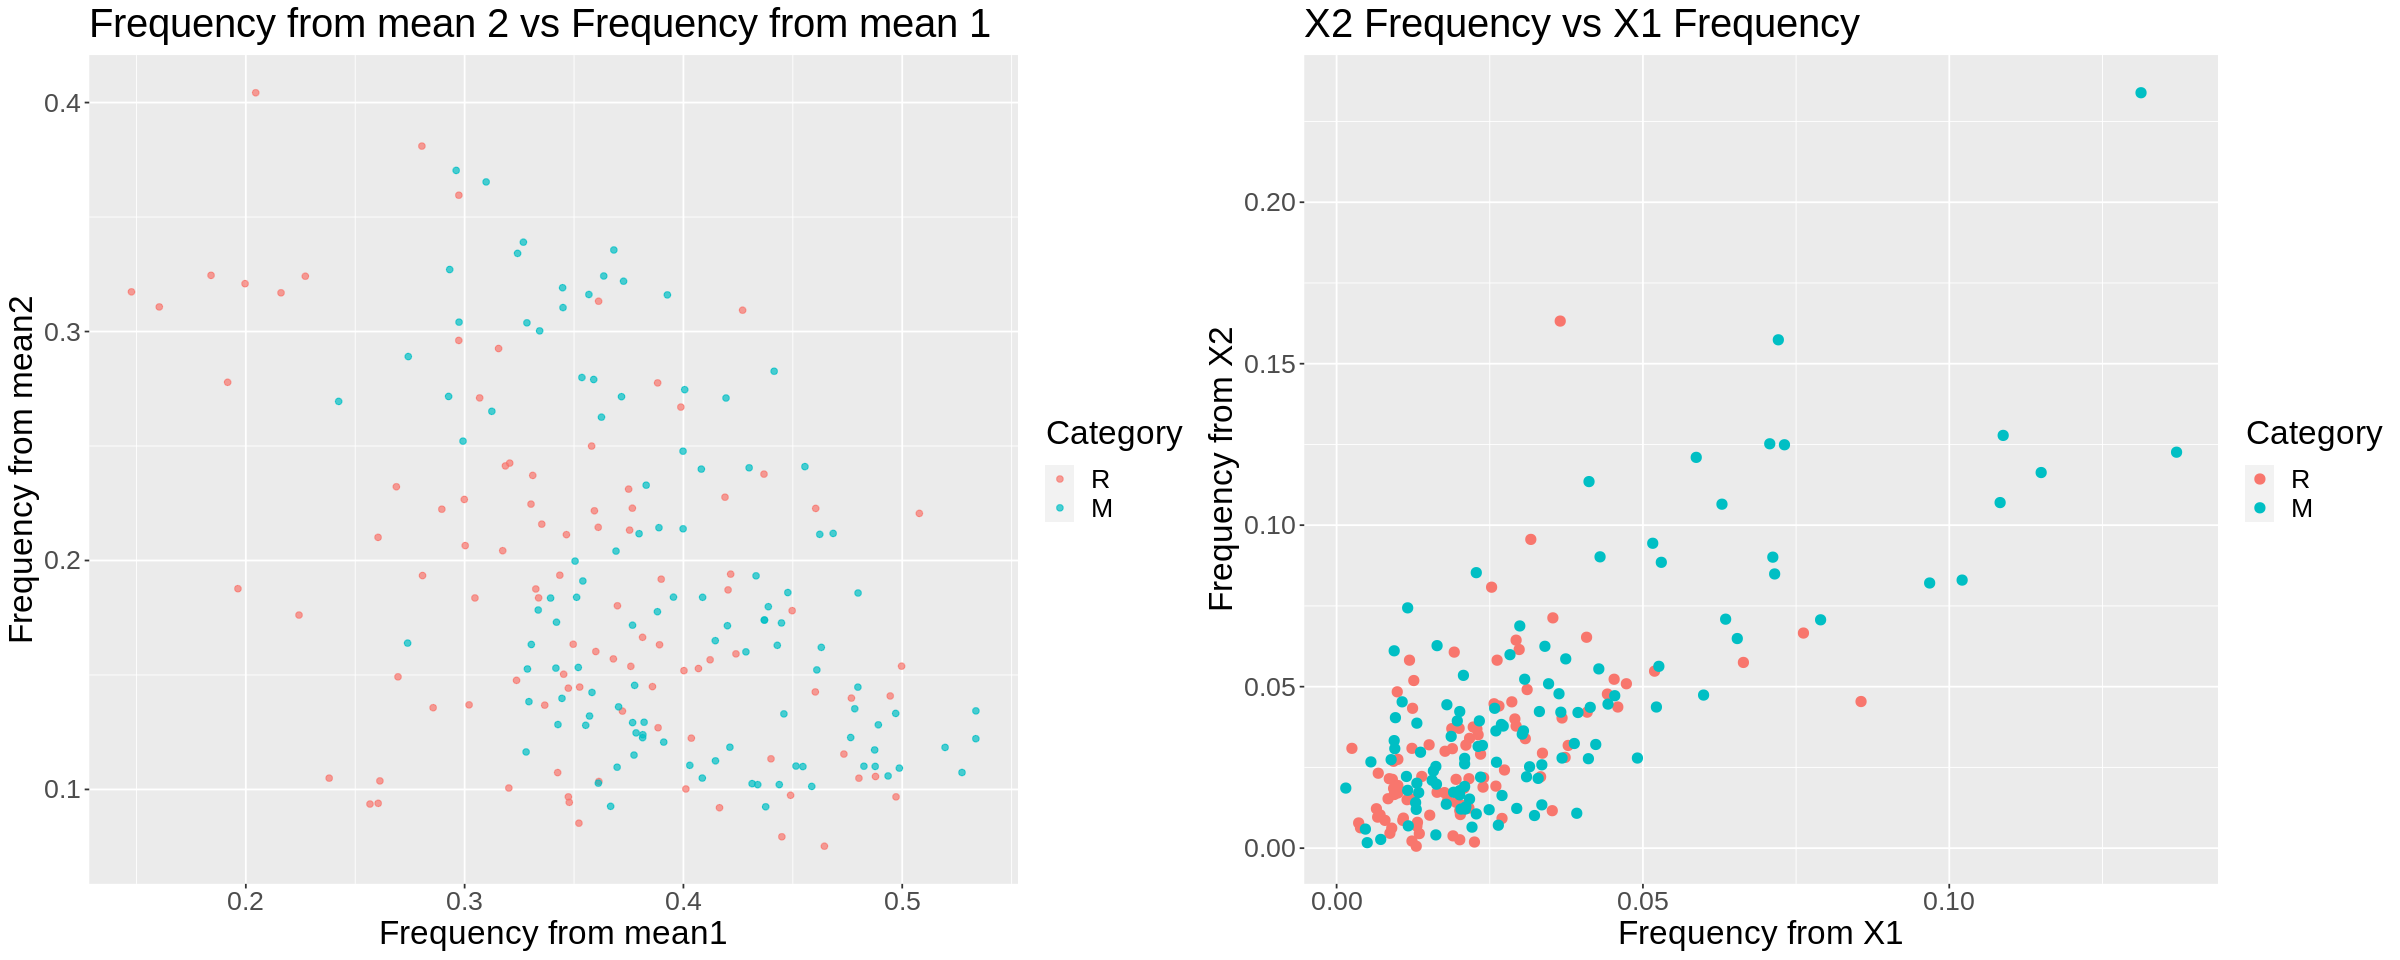

In [37]:
options(repr.plot.width = 20, repr.plot.height = 8)

plot_grid(average_plot, sonar_data_plot)

# Method
To conduct our anaylsis we will look at the different columns,X1,X2 etc and comapare the values that are given off, in order to identify what values are given off certain objects when certain frequencies from sonar apparatus are used. We will use scatterplots so that we are able to use classification methods to predict future values that may be obtained to identify whether it is a rock or a mine (metallic object).

## Expected Outcomes and Significance
From this we expect to be able to use our graphs and analysis to predict the types of objects that are under water. Essentialy our analysis can be used by scientists and sailors who need to map out their journeys and avoid things like shipwrecks. Moreover, divers who are intrested in cleaning the seafloors can benefit from such data.
